In [1]:
import numpy as np

In [2]:
data = np.load("band_09.npy")

In [3]:
data.shape

(256, 256, 8)

In [4]:
type(data)

numpy.ndarray

In [5]:
data[:,:,0].shape

(256, 256)

In [6]:
import cv2

In [7]:
resized = cv2.resize(data, dsize=(32,32))

In [8]:
resized.shape

(32, 32, 8)

In [9]:
#7GB 로 데이터를 줄일 수가 있음 => good for education
450 / (256 * 256 / 32 / 32)

7.03125

In [10]:
import matplotlib.pyplot as plt

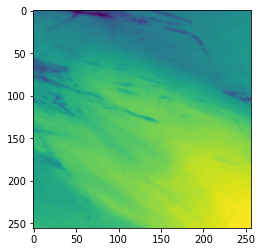

In [11]:
plt.imshow(data[:,:,0])

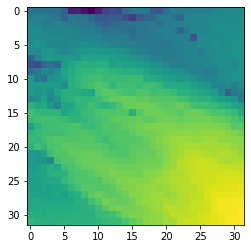

In [12]:
plt.imshow(resized[:,:,0])

In [13]:
np.save("band_09_3232",resized)

In [14]:
for i in range(8):
    cv2.imwrite('band_09_3232_'+str(i)+'.jpg', resized[:,:,i])

In [23]:
256*256 / 32 / 32

64.0

In [ ]:
실행전 가설 => 32,32로 줄이면 1/64가 될것이다.

### 정리

## 기존 band_09.npy 용량 : 2.00MB

## 32,32로 줄인 후 band_09_3232_npy 용량 : 32.1KB

## 32,32로 줄인 후 8개 각각 사진파일로 저장
## 이미지는 압축률이 높기 때문에 그냥 저장보다 용량이 더 많이 줄어들음. 근데 읽는 속도가 npy가 더빠르려나?
total : 3550 byte 3.466796875 KB  
0 : 438 byte  
1 : 443  
2 : 444  
3 : 440  
4 : 447  
5 : 447  
6 : 443  
7 : 448  


In [25]:
(2*1024) / 32.1

63.8006230529595

In [26]:
(2*1024) / 3.47

590.2017291066282

# 단순계산으로 1/63 사이즈가 되어 버림 => 가설이 거의 맞았고, 그나마도 이미지로 저장하면 1/590 사이즈가 됨.

In [27]:
32.1 / 3.47

9.250720461095101

In [ ]:
256,256 => img == 2 / 9.2

In [28]:
2 / 9.2

0.2173913043478261

In [ ]:
200kb... => 450 / 9.2

In [29]:
450 / 9.2

48.913043478260875

In [ ]:
48기가가 됨. 와 사이즈가 크긴 크구나.

In [ ]:
가설이 거의 맞았기 때문에 128 , 64도 마찬가지로 계산 가능할듯

In [33]:
data_size = 450
npy_to_img_rate = 9.2
after_img = data_size/npy_to_img_rate

data_area = 256*256
resize_list = [128, 64, 32]

print(data_size, "GB Dataset")
print("if it is img", data_size/npy_to_img_rate)
for i in range(3):
    after_resize_npy = data_size / (data_area / (resize_list[i] * resize_list[i]))
    after_resize_jpg = after_resize_npy / npy_to_img_rate
    
    print(resize_list[i], "th turn")
    print("npy_size : ", after_resize_npy, 'GB')
    print("img_size : ", after_resize_jpg, 'GB')

450 GB Dataset
if it is img 48.913043478260875
128 th turn
npy_size :  112.5 GB
img_size :  12.228260869565219 GB
64 th turn
npy_size :  28.125 GB
img_size :  3.0570652173913047 GB
32 th turn
npy_size :  7.03125 GB
img_size :  0.7642663043478262 GB


In [ ]:
유일한 걱정은 resize 하면서 구름 픽셀이 사라지나 하는 건데
무조건 값을 남기라고 하면 되려나? interpolation을 잘 하면 되려나?

In [ ]:
위 데이터 들을 종류별로 다 준비해서 올리면 어그로로 좋을거 같은데?
=> 근데 112 gb 28gb는 좀 그렇고, img로 만들어서 npy로 바꾸는 코드랑 같이 올려주면 될듯?

그럼 다 합쳐도 15GB가 안될테니까

In [15]:
a=[438,
443,
444,
440,
447,
447,
443,
448]

In [16]:
np.sum(a)

3550

In [17]:
np.sum(a)/1024

3.466796875

In [ ]:
중복제거 => 완전히 동일한 용량의 이미지끼리 모아서
=> 이들끼리 RGB가 완전히 같은지 비교하면 되지 않을까?